In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import bibtexparser

pd.set_option("display.max_rows",200)
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 1000)


with open('data/mybib.bib') as bibtex_file:
    bibtex_str = bibtex_file.read()

selected = bibtexparser.loads(bibtex_str)
db = pd.DataFrame(selected.entries)

In [26]:
import numpy as np
from matplotlib.pyplot import figure


data = db
size = 0.3
vals = data['journal'].value_counts()
vals = vals.sort_values(ascending=False)

vals['Others'] = vals[11:].sum()
vals = vals.iloc[[0,1,2,3,4,5,6,7,8,9,10,-1]]

<Figure size 2400x1800 with 0 Axes>

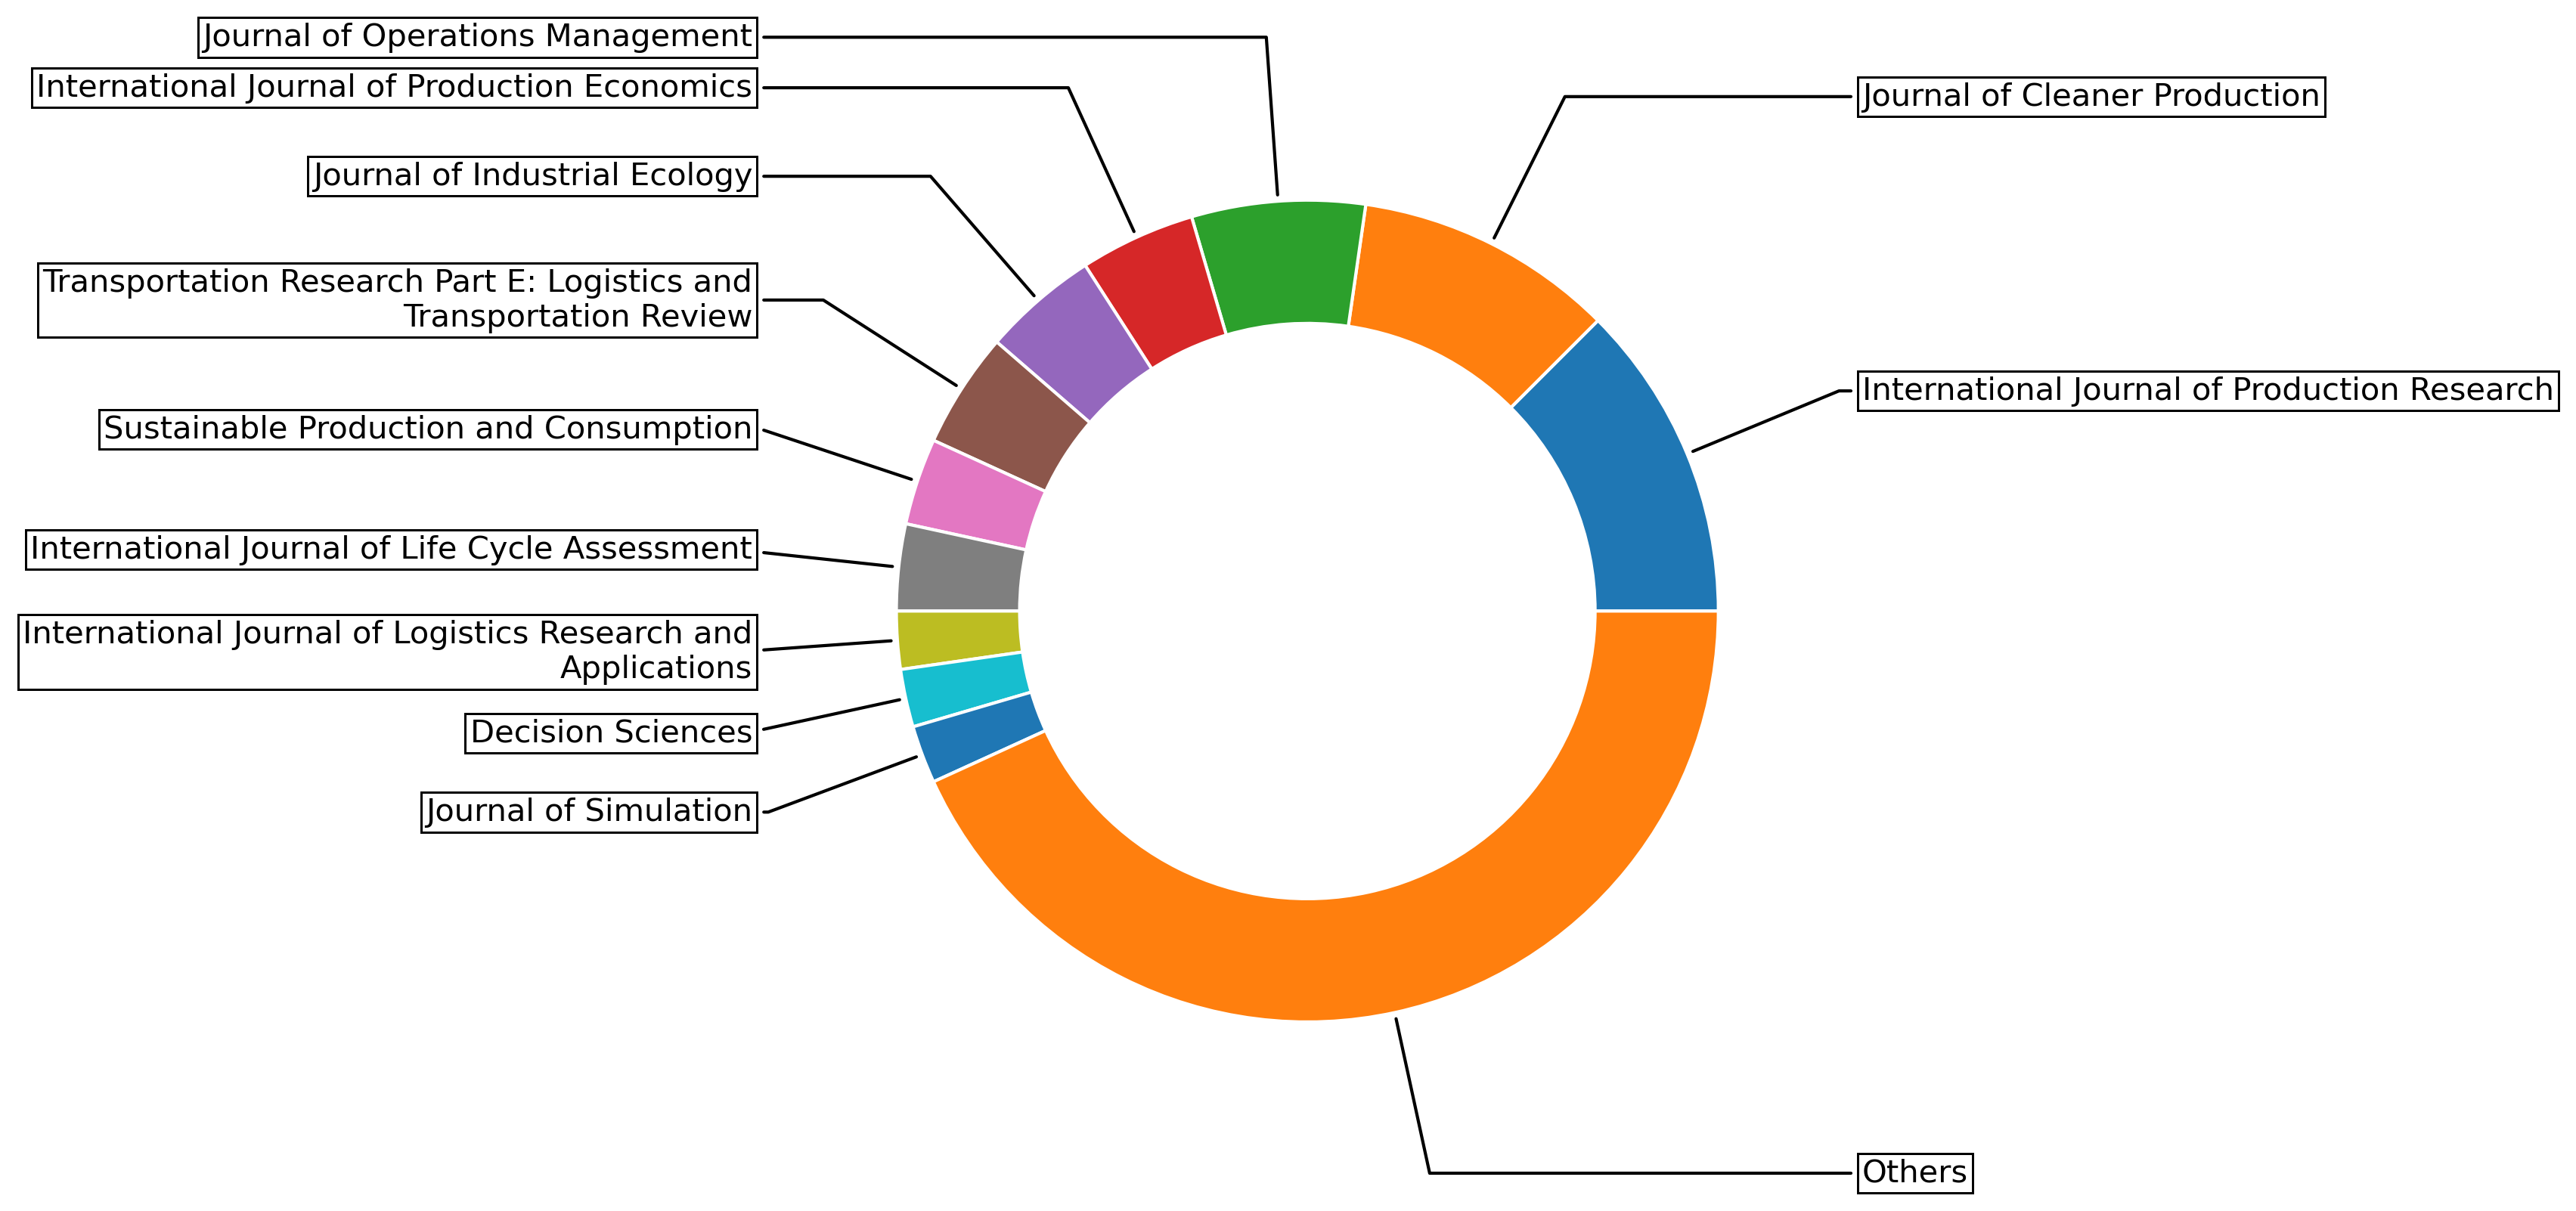

In [34]:
figure(figsize=(12, 6), dpi=300)
wedges, texts = plt.pie(vals.values, radius=1, wedgeprops=dict(width=size, edgecolor='w'),
                         # autopct='%1.0f%%'
                        )
bbox_props = dict(boxstyle="square,pad=0.15", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    plt.annotate(vals.index[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

plt.savefig("figures/figureS3.png", dpi=300)

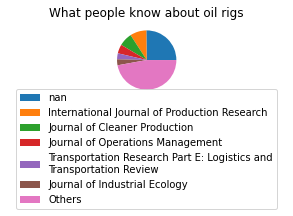